<a href="https://colab.research.google.com/github/mobarakol/AI_Medical_Imaging/blob/main/PCA_tSNE_UMAP_Brain_Tumor_Practical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MNIST: Digits dataset<br>
<img src="https://datasets.activeloop.ai/wp-content/uploads/2019/12/MNIST-handwritten-digits-dataset-visualized-by-Activeloop.webp" alt="MNIST">

#PCA

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']
total dimension after PCA reduction: (1797, 2)


<ipython-input-1-964dc3e93a02>:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  c_map = plt.cm.get_cmap('jet', 10)


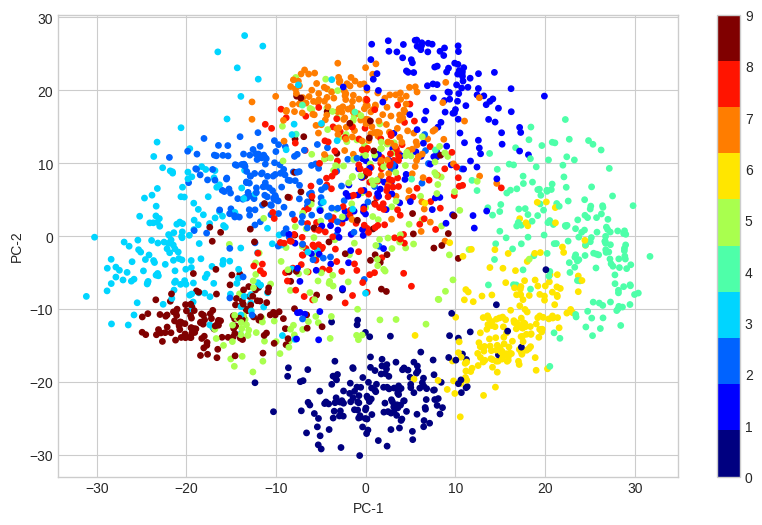

In [ ]:
#Import required modules
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
import numpy as np
import matplotlib.pyplot as plt
print(plt.style.available)

digits = load_digits()

pca = PCA(2) # we need 2 principal components.
converted_data = pca.fit_transform(digits.data)

print('total dimension after PCA reduction:', converted_data.shape)

plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize = (10,6))
c_map = plt.cm.get_cmap('jet', 10)
plt.scatter(converted_data[:, 0], converted_data[:, 1], s = 15,
            cmap = c_map , c = digits.target)
plt.colorbar()
plt.xlabel('PC-1') , plt.ylabel('PC-2')
plt.show()

#t-SNE

total dimension after t-SNE reduction: (1797, 2)


<Figure size 640x480 with 0 Axes>

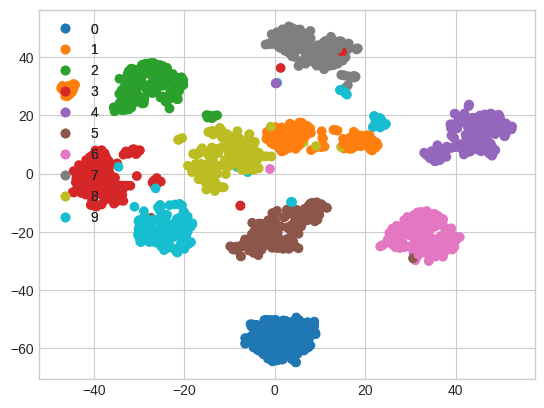

In [ ]:
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits

digits = load_digits()

X_embedded = TSNE().fit_transform(digits.data)

print('total dimension after t-SNE reduction:', X_embedded.shape)

plt.set_cmap('tab10')

fig, ax = plt.subplots()
scatter = ax.scatter(X_embedded[:,0],X_embedded[:,1],c=digits.target)

legend = ax.legend(*scatter.legend_elements(),loc="upper left")
ax.add_artist(legend)

plt.show()
plt.close()


#tSNE-3D

In [ ]:
from sklearn.manifold import TSNE
import plotly.express as px
from sklearn.datasets import load_digits

digits = load_digits()

X_embedded = TSNE(n_components=3, random_state=0).fit_transform(digits.data)
fig = px.scatter_3d(
    X_embedded, x=0, y=1, z=2, title='t-SNE',width=400, height=400,
    color=digits.target, labels={'color': 'digits'}
)
fig.update_traces(marker_size=8)
fig.show()

#UMAP

In [ ]:
!pip -q install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.3 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



Text(0.5, 1.0, 'UMAP')

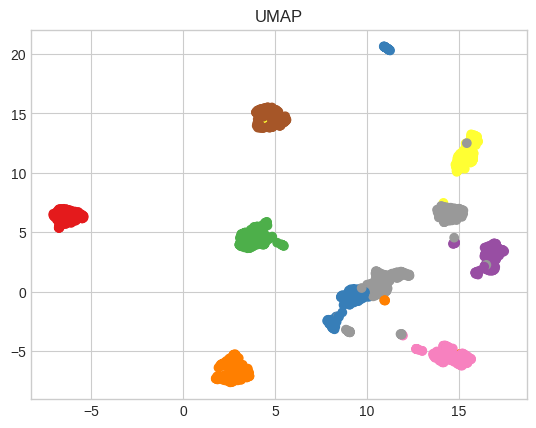

In [ ]:
from umap import UMAP
from sklearn.datasets import load_digits

digits = load_digits()

X_UMAP = UMAP(n_neighbors=15,
                      min_dist=0.1,
                      metric='correlation').fit_transform(digits.data)

plt.scatter(X_UMAP[:,0], X_UMAP[:,1], c=digits.target, cmap='Set1')
plt.title("UMAP")

# Brain Tumor Dataset
source: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset<br>
class_names = ['glioma', 'meningioma', 'notumor', 'pituitary']<br>
number of training MRIs slices = 5712 <br>
number of testing MRIs slices = 1311 <br>

Download the dataset:

In [ ]:
import gdown

url = 'https://drive.google.com/uc?id=1Oms9X0Vpid_kN8jiSgz-3MhRA5BcmivE'
gdown.download(url,'braintumor.zip',quiet=True)
!unzip -q braintumor.zip -d braintumor

Visualize some samples:

train sample size: 5712 test sample size: 1311
{'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}
(5712, 784)


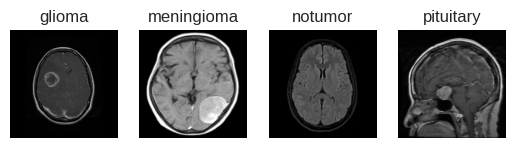

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
from torchvision import datasets

normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                    std=[0.229, 0.224, 0.225])
my_transform = transforms.Compose([
        transforms.Resize((28,28)),
        transforms.ToTensor(),
        normalize,
    ])

train_dataset = datasets.ImageFolder(root='/content/braintumor/Training', transform=my_transform)
test_dataset = datasets.ImageFolder(root='/content/braintumor/Testing', transform=my_transform)

print('train sample size:', len(train_dataset), 'test sample size:', len(test_dataset))
print(train_dataset.class_to_idx)

img_all = []
label_all = []
for data, lab in train_dataset:
    img_all.append(np.array(data)[0,:,:])
    label_all.append(lab)

img_all = np.array(img_all).reshape(len(train_dataset),28*28)
label_all = np.array(label_all)
print(img_all.shape)


class_names = ['glioma', 'meningioma', 'notumor', 'pituitary']
newsize = (224, 224)
img_glioma = Image.open('braintumor/Testing/glioma/Te-gl_0014.jpg').resize(newsize)
img_meningioma = Image.open('braintumor/Testing/meningioma/Te-me_0017.jpg').resize(newsize)
img_healthy = Image.open('braintumor/Testing/notumor/Te-noTr_0002.jpg').resize(newsize)
img_pituitary = Image.open('braintumor/Testing/pituitary/Te-piTr_0008.jpg').resize(newsize)
plt.subplot(1,4,1), plt.axis('OFF'), plt.title(class_names[0]), plt.imshow(img_glioma)
plt.subplot(1,4,2), plt.axis('OFF'),plt.title(class_names[1]), plt.imshow(img_meningioma)
plt.subplot(1,4,3), plt.axis('OFF'),plt.title(class_names[2]), plt.imshow(img_healthy)
plt.subplot(1,4,4), plt.axis('OFF'),plt.title(class_names[3]), plt.imshow(img_pituitary);

In [ ]:
len(img_all)

5712

#Task-1: PCA

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(2) # we need 2 principal components.
converted_data = pca.fit_transform(img_all)

print('total dimension after PCA reduction:', converted_data.shape)

#Add your code

#Task-2: PCA from Scratch

<h2>Principal Component Analysis (PCA) - 5 Key Steps</h2>

<ol>
  <li>
    <h3>Step 1: Mean-Center the Data</h3>
    <p>Compute the mean of each feature and subtract it from the dataset.</p>
    <p>
      <em>X̄ = X − 1μᵀ</em><br>
      Where:
      <ul>
        <li><em>X</em> is the original data matrix (<em>n × d</em>).</li>
        <li><em>μ</em> is the mean vector (<em>d × 1</em>).</li>
        <li><em>1</em> is an <em>n × 1</em> column of ones.</li>
      </ul>
    </p>
  </li>

  <li>
    <h3>Step 2: Compute the Covariance Matrix</h3>
    <p>Calculate the covariance matrix to measure feature relationships.</p>
    <p>
      <em>S = (1 / (n − 1)) · X̄ᵀX̄</em><br>
      <strong>Dimensions:</strong> S is a <em>d × d</em> covariance matrix.
    </p>
  </li>

  <li>
    <h3>Step 3: Perform Eigen-Decomposition</h3>
    <p>Find the eigenvalues and eigenvectors of the covariance matrix.</p>
    <p>
      <em>Sv<sub>i</sub> = λ<sub>i</sub>v<sub>i</sub></em><br>
      <strong>Eigen-decomposition:</strong>
      <ul>
        <li><em>V</em> contains eigenvectors (principal components).</li>
        <li><em>Λ</em> is a diagonal matrix with eigenvalues.</li>
      </ul>
      <em>S = VΛVᵀ</em>
    </p>
  </li>

  <li>
    <h3>Step 4: Select Top k Principal Components</h3>
    <p>Pick the eigenvectors corresponding to the k largest eigenvalues.</p>
    <p>
      <em>V<sub>k</sub> = [v<sub>1</sub>, v<sub>2</sub>, …, v<sub>k</sub>]</em><br>
      This matrix (<em>d × k</em>) reduces the dimensionality while retaining the most variance.
    </p>
  </li>

  <li>
    <h3>Step 5: Transform the Data (Projection)</h3>
    <p>Project the original data onto the new lower-dimensional subspace.</p>
    <p>
      <em>Z = X̄V<sub>k</sub></em><br>
      <strong>Output:</strong> <em>Z</em> is the reduced-dimensional representation of <em>X</em> with shape (<em>n × k</em>).
    </p>
  </li>
</ol>


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# -------------------------------------------------------
# 2) Manual PCA function
# -------------------------------------------------------
def pca_from_scratch(X, n_components=2):
    """
    Perform PCA on data X (shape: num_samples x num_features),
    returning the projected data with shape: (num_samples, n_components).
    """
    # 1) Center the data (subtract mean of each feature).
    mean_vec = np.mean(X, axis=0)              # shape (num_features,)
    X_centered = X - mean_vec                  # shape (num_samples, num_features)

    # 2) Compute covariance matrix of shape (num_features, num_features).
    #    For numerical stability on large data, you might prefer to do SVD on X_centered directly.
    #    But here we'll show the straightforward approach:
    num_samples = X_centered.shape[0]
    Cov = (X_centered.T @ X_centered) / (num_samples - 1)  # shape (num_features, num_features)

    # 3) Eigen-decomposition
    eigvals, eigvecs = #Add your code  # np.linalg.eig

    # 4) Sort eigenvalues (and corresponding eigenvectors) descending by magnitude
    sort_indices = np.argsort(eigvals)[::-1]
    eigvals_sorted = eigvals[sort_indices]
    eigvecs_sorted = eigvecs[:, sort_indices]

    # 5) Select the top n_components
    top_vectors = #Add your code  # shape (num_features, n_components)

    # 6) Project data onto top eigenvectors
    #    (num_samples, num_features) x (num_features, n_components) => (num_samples, n_components)
    X_pca = X_centered @ top_vectors

    return X_pca

# -------------------------------------------------------
# 3) Run PCA on the flattened images
# -------------------------------------------------------
num_samples = len(img_all)
converted_data = pca_from_scratch(img_all, n_components=2)

print("Total dimension after PCA reduction:", converted_data.shape)  # should be (num_samples, 2)

# -------------------------------------------------------
# 4) Plot the results
# -------------------------------------------------------
# 'converted_data[:,0]' is PC1, 'converted_data[:,1]' is PC2.
fig, ax = plt.subplots()
scatter = ax.scatter(converted_data[:, 0], converted_data[:, 1],
                     c=label_all, cmap='Set1', alpha=0.8)
legend = ax.legend(*scatter.legend_elements(), loc="lower left")
ax.add_artist(legend)
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_title("PCA (2D) from Scratch")
plt.show()
plt.close()


#Task-2: T-SNE

In [ ]:
from sklearn.manifold import TSNE

#Add your code

UMAP

In [ ]:
!pip -q install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 6.1 MB/s eta 0:00:00


In [ ]:
from umap import UMAP


#Add your code